In [1]:
import os
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

from MES_LSTM.model import *
from utils.metrics import *

import warnings
warnings.simplefilter('ignore')

# check version
print(tf.keras.__version__)
print(tf.__version__)
print(tfp.__version__)
print(len(tf.config.experimental.list_physical_devices('GPU')))

2.4.0
2.4.1
0.12.2
0


In [2]:
pre_layer = preprocess(first_time = 0) # change first time to 1 if first time running to download data
df = pre_layer.load_data()
df = pre_layer.clean_data(df)
df = pre_layer.fill_missing(df)
scaled_df, df_scaler = pre_layer.scale(df)
scaled_df

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[INFO] data cleaned
[INFO] the dataframe has 29 columns in total and 16 columns that have missing values.
                             Missing Values  % of Total Values
weekly_icu_admissions                   602              100.0
total_boosters                          602              100.0
handwashing_facilities                  602              100.0
weekly_hosp_admissions                  525               87.2
excess_mortality_cumulative             519               86.2
excess_mortality                        519               86.2
people_fully_vaccinated                 346               57.5
total_vaccinations                      342               56.8
people_vaccinated                       342               56.8
positive_rate                            71               11.8
icu_patients                             64               10.6
total_tests                              64               10.6
hosp_patients                            58                9.6
total_deaths

,total_cases,total_deaths,reproduction_rate,icu_patients,hosp_patients,total_tests,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index
2020-01-31,1.000000,1.219110,1.559178,1.218080,1.210400,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-02-01,1.000000,1.219110,1.559178,1.218080,1.210400,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-02-02,1.000000,1.219315,1.545226,1.216766,1.209083,1.000253,1.016054,1.034911,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-02-03,1.000001,1.219316,1.545226,1.216766,1.209083,1.000254,1.016054,1.034911,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-02-04,1.000001,1.219316,1.545226,1.216766,1.209083,1.000254,1.016054,1.034911,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-19,1.982003,1.995468,1.180887,1.235499,1.180283,1.898004,1.263850,1.375971,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-09-20,1.986731,1.995836,1.191126,1.229525,1.181452,1.993237,1.438538,1.443700,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-09-21,1.990834,1.997334,1.284103,1.219816,1.176619,2.000000,1.402287,1.364253,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-09-22,1.995284,1.998568,1.237970,1.504580,1.422368,1.932939,1.493903,1.510909,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [3]:
mes_layer = ES()
params, internals = mes_layer.es(scaled_df)
es_scaled, df_trend, df_seas = mes_layer.deTS(scaled_df, internals)

es_scaled

[INFO] internals loaded


,total_cases,total_deaths,reproduction_rate,icu_patients,hosp_patients,total_tests,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index
2020-01-31,-7.204274e-07,0.003176,-0.000906,-0.006506,-0.005493,-3.885781e-16,-6.661338e-15,-9.103829e-14,7.257356e-10,7.257356e-10,7.257356e-10,7.257356e-10,7.257356e-10,7.257356e-10,7.257356e-10,7.257356e-10,7.257356e-10,7.257356e-10,7.257356e-10,7.257356e-10
2020-02-01,6.669065e-07,0.003176,-0.000906,-0.006408,-0.005493,1.665335e-16,-3.727574e-13,-4.325429e-13,1.447832e-09,1.447832e-09,1.447832e-09,1.447832e-09,1.447832e-09,1.447832e-09,1.447832e-09,1.447832e-09,1.447832e-09,1.447832e-09,1.447832e-09,1.447832e-09
2020-02-02,5.140354e-07,0.003160,-0.000929,-0.006438,-0.005601,2.482703e-05,-9.309038e-04,7.144951e-12,2.166317e-09,2.166317e-09,2.166317e-09,2.166317e-09,2.166317e-09,2.166317e-09,2.166317e-09,2.166317e-09,2.166317e-09,2.166317e-09,2.166317e-09,2.166317e-09
2020-02-03,1.657270e-07,0.003160,-0.000929,-0.006458,-0.005601,2.476437e-05,-9.308976e-04,-2.009504e-12,2.881209e-09,2.881209e-09,2.881209e-09,2.881209e-09,2.881209e-09,2.881209e-09,2.881209e-09,2.881209e-09,2.881209e-09,2.881209e-09,2.881209e-09,2.881209e-09
2020-02-04,7.373985e-09,0.003160,-0.000929,-0.006380,-0.005601,2.476437e-05,-9.308976e-04,-1.832645e-12,3.592525e-09,3.592525e-09,3.592525e-09,3.592525e-09,3.592525e-09,3.592525e-09,3.592525e-09,3.592525e-09,3.592525e-09,3.592525e-09,3.592525e-09,3.592525e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-19,-9.084126e-03,-0.002661,0.022993,-0.325046,-0.293837,-8.777676e-02,-1.893570e-02,9.529430e-02,1.340009e-07,1.340009e-07,1.340009e-07,1.340009e-07,1.340009e-07,1.340009e-07,1.340009e-07,1.340009e-07,1.340009e-07,1.340009e-07,1.340009e-07,1.340009e-07
2021-09-20,-9.123573e-03,-0.002662,-0.032294,-0.346043,-0.308801,-1.904408e-03,-8.818642e-02,-1.119838e-01,1.340255e-07,1.340255e-07,1.340255e-07,1.340255e-07,1.340255e-07,1.340255e-07,1.340255e-07,1.340255e-07,1.340255e-07,1.340255e-07,1.340255e-07,1.340255e-07
2021-09-21,-9.168376e-03,-0.002666,0.060045,-0.358859,-0.316074,9.880985e-15,-1.267211e-01,-1.895208e-01,1.340498e-07,1.340498e-07,1.340498e-07,1.340498e-07,1.340498e-07,1.340498e-07,1.340498e-07,1.340498e-07,1.340498e-07,1.340498e-07,1.340498e-07,1.340498e-07
2021-09-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[INFO] data shape: train = (542, 20), valid = (15, 20), test = (45, 20), x_train = (542, 18), y_train = (542, 2), x_valid = (15, 18), y_valid = (15, 2), x_test = (45, 18)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 70)                24920     
_________________________________________________________________
dense (Dense)                (None, 2)                 142       
Total params: 25,062
Trainable params: 25,062
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
17/17 [==============================] - 8s 364ms/step - loss: 9.6923e-06 - val_loss: 2.0004e-07
Epoch 2/15
17/17 [==============================] - 0s 18ms/step - loss: 2.3377e-06 - val_loss: 1.2836e-06
Epoch 3/15
17/17 [==============================] - 0s 22ms/step - loss: 1.1330e-06 - val_loss: 3.7535e-07
Epoch 4/15
17/17

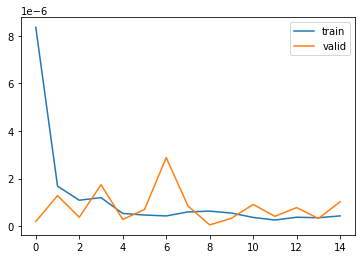

In [4]:
dl_layer = lstm()
train, valid, test, x_train, y_train, x_valid, y_valid, x_test = dl_layer.split(es_scaled)
y_pred_es_scaled = dl_layer.forecast_model(test, x_train, y_train, x_valid, y_valid, x_test)

[INFO] forecasts saved in results folder


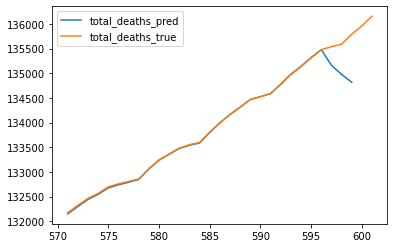

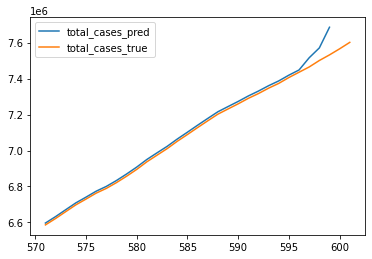

In [5]:
forecasts = dl_layer.reTS(y_pred_es_scaled, es_scaled, train, valid, df_trend, df_seas, df_scaler, df)

### prediction intervals

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 70)                24920     
_________________________________________________________________
dense_flipout (DenseFlipout) (None, 2)                 282       
Total params: 25,202
Trainable params: 25,202
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
17/17 [==============================] - 3s 58ms/step - loss: 353.1652 - val_loss: 351.3170
Epoch 2/15
17/17 [==============================] - 0s 21ms/step - loss: 350.6997 - val_loss: 348.8585
Epoch 3/15
17/17 [==============================] - 0s 19ms/step - loss: 348.2614 - val_loss: 346.4423
Epoch 4/15
17/17 [==============================] - 0s 20ms/step - loss: 345.8525 - val_loss: 344.0537
Epoch 5/15
17/17 [==============================] - 0s 21ms/step - loss: 343.4678 - val_loss: 3

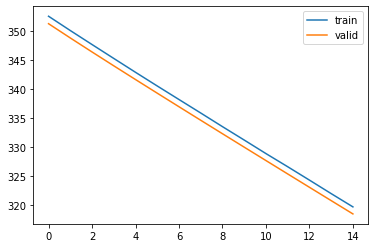

[INFO] prediction intervals computed


In [6]:
pi_pred_es_scaled = dl_layer.pi_model(test, x_train, y_train, x_valid, y_valid, x_test)

[INFO] prediction intervals saved in results folder


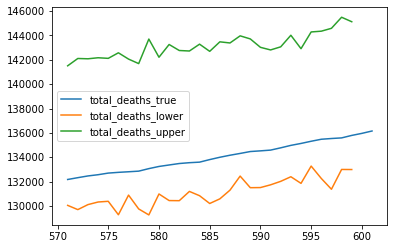

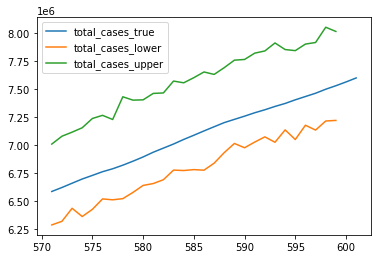

In [7]:
pi = dl_layer.reTS_pi(pi_pred_es_scaled, es_scaled, train, valid, df_trend, df_seas, df_scaler, df)

In [8]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(mis(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values, alpha = dl_layer.alpha))
print(mis(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values, alpha = dl_layer.alpha))

nan
nan


In [9]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(coverage(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values))
print(coverage(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values))

93.54838709677419
93.54838709677419


In [10]:
print(smape(forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(smape(forecasts['total_cases_true'], forecasts['total_cases_pred']))

0.056767354335006855
0.28320834851454546


In [11]:
print(rmse(forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(rmse(forecasts['total_cases_true'], forecasts['total_cases_pred']))

225.26557761173575
34841.16940546023


# RNN

[INFO] data shape: train = (542, 20), valid = (15, 20), test = (45, 20), x_train = (542, 18), y_train = (542, 2), x_valid = (15, 18), y_valid = (15, 2), x_test = (45, 18)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 70)                24920     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 142       
Total params: 25,062
Trainable params: 25,062
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
17/17 [==============================] - 2s 48ms/step - loss: 0.7160 - val_loss: 0.8820
Epoch 2/15
17/17 [==============================] - 0s 18ms/step - loss: 0.1241 - val_loss: 0.6721
Epoch 3/15
17/17 [==============================] - 0s 19ms/step - loss: 0.0880 - val_loss: 0.5144
Epoch 4/15
17/17 [=====================

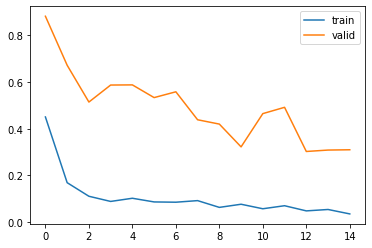

[INFO] forecasts saved in results folder


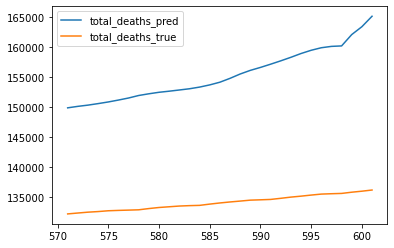

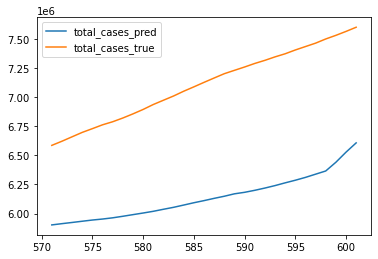

In [12]:
dl_layer = lstm(results_path = 'results/pure_lstm/')
train, valid, test, x_train, y_train, x_valid, y_valid, x_test = dl_layer.split(scaled_df)
y_pred_scaled = dl_layer.forecast_model(test, x_train, y_train, x_valid, y_valid, x_test)

forecasts = dl_layer.descale(y_pred_scaled, scaled_df, train, valid, df_scaler, df)

### prediction intervals

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 70)                24920     
_________________________________________________________________
dense_flipout_1 (DenseFlipou (None, 2)                 282       
Total params: 25,202
Trainable params: 25,202
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
17/17 [==============================] - 3s 52ms/step - loss: 357.2849 - val_loss: 354.5780
Epoch 2/15
17/17 [==============================] - 0s 25ms/step - loss: 353.3804 - val_loss: 352.2312
Epoch 3/15
17/17 [==============================] - 0s 19ms/step - loss: 350.8778 - val_loss: 349.5167
Epoch 4/15
17/17 [==============================] - 0s 19ms/step - loss: 348.5430 - val_loss: 347.5265
Epoch 5/15
17/17 [==============================] - 0s 19ms/step - loss: 346.1304 - val_loss: 3

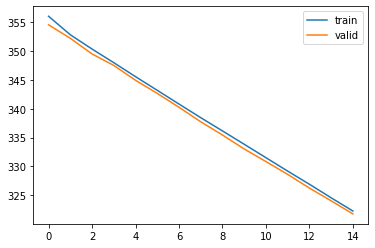

[INFO] prediction intervals computed
[INFO] prediction intervals saved in results folder


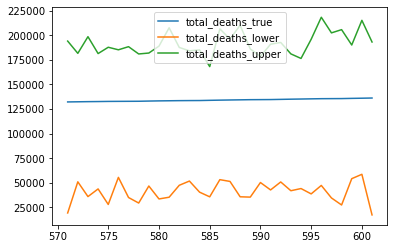

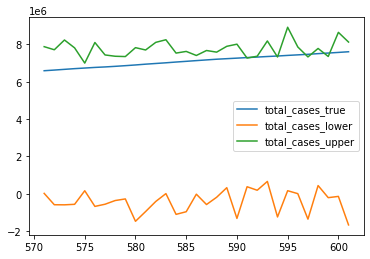

In [13]:
pi_pred_scaled = dl_layer.pi_model(test, x_train, y_train, x_valid, y_valid, x_test)

pi = dl_layer.descale_pi(pi_pred_scaled, scaled_df, train, valid, df_scaler, df)

In [14]:
pi.head()

,total_deaths_true,total_deaths_lower,total_cases_lower,total_cases_true,total_deaths_upper,total_cases_upper
571,132174.0,19209.244782,23407.337616,6586181.0,194085.329863,7.873742e+06
572,132323.0,50892.455961,-584566.617863,6621799.0,181616.855843,7.708014e+06
573,132465.0,35879.726782,-589246.498290,6659916.0,198558.338558,8.230905e+06
574,132566.0,43668.614432,-561872.473640,6697770.0,181379.629281,7.809256e+06
575,132699.0,27880.647638,164129.159949,6729912.0,187804.647204,6.994487e+06


In [15]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(mis(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values, alpha = dl_layer.alpha))
print(mis(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values, alpha = dl_layer.alpha))

150665.36470114999
8431028.593629457


In [16]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(coverage(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values))
print(coverage(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values))

100.0
87.09677419354838


In [17]:
print(smape(forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(smape(forecasts['total_cases_true'], forecasts['total_cases_pred']))

14.679788482594255
14.551870077697096


In [18]:
print(rmse(forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(rmse(forecasts['total_cases_true'], forecasts['total_cases_pred']))

21499.501616165413
976672.2838450053


# VARMAX

[INFO] data shape: train = (542, 20), test = (60, 20), x_train = (542, 18), y_train = (542, 2), x_test = (60, 18)
[INFO] VARMAX fitting complete
[INFO] forecasts saved in results folder
[INFO] prediction intervals saved in results folder


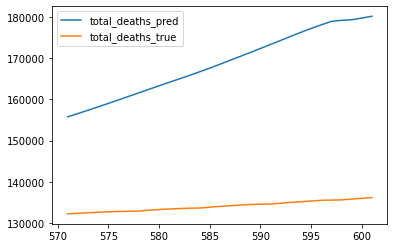

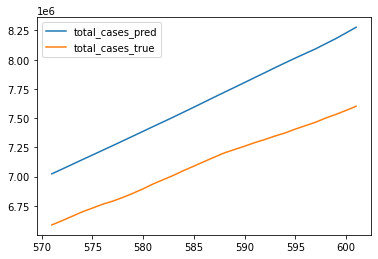

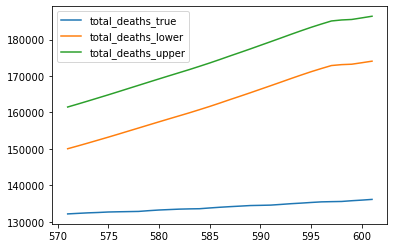

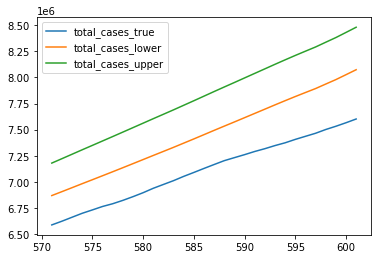

In [19]:
bench = stats()
train, test, x_train, x_test = bench.split(scaled_df)
y_pred_scaled, pi_pred_scaled = bench.forecast_varmax(test, x_train, y_train, x_test)
forecasts = bench.descale(y_pred_scaled, scaled_df, train, valid, df_scaler, df)
pi = bench.descale_pi(pi_pred_scaled, scaled_df, train, valid, df_scaler, df)

In [20]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(mis(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values, alpha = dl_layer.alpha))
print(mis(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values, alpha = dl_layer.alpha))

585208.6756716304
7368072.777859878


In [21]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(coverage(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values))
print(coverage(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values))

0.0
0.0


In [22]:
print(smape(forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(smape(forecasts['total_cases_true'], forecasts['total_cases_pred']))

22.766621929853645
7.20150094303036


In [23]:
print(rmse(forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(rmse(forecasts['total_cases_true'], forecasts['total_cases_pred']))

35253.46833960568
537606.8063345605


# SARIMAX

[INFO] SARIMAX fitting complete
[INFO] forecasts saved in results folder
[INFO] prediction intervals saved in results folder


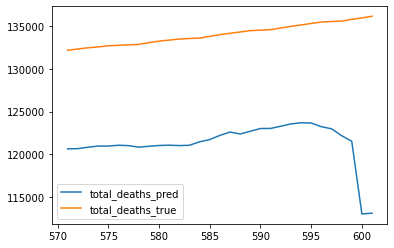

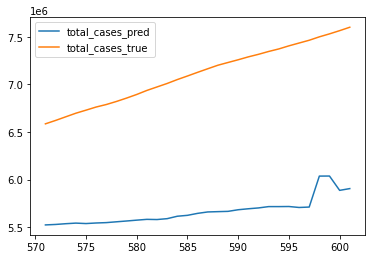

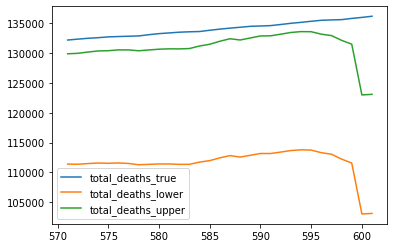

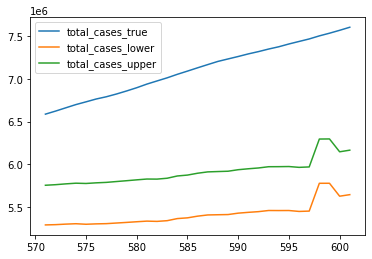

In [24]:
bench = stats(results_path = 'results/sarimax/')
# train, test, x_train, x_test = bench.split(scaled_df)
y_pred_scaled, pi_pred_scaled = bench.forecast_sarimax(test, x_train, y_train, x_test)
forecasts = bench.descale(y_pred_scaled, scaled_df, train, valid, df_scaler, df)
pi = bench.descale_pi(pi_pred_scaled, scaled_df, train, valid, df_scaler, df)

In [25]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(mis(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values, alpha = dl_layer.alpha))
print(mis(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values, alpha = dl_layer.alpha))

79535.61810192378
24364681.563714266


In [26]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(coverage(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values))
print(coverage(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values))

0.0
0.0


In [27]:
print(smape(forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(smape(forecasts['total_cases_true'], forecasts['total_cases_pred']))

9.969225229905806
22.521965437988804


In [28]:
print(rmse(forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(rmse(forecasts['total_cases_true'], forecasts['total_cases_pred']))

13008.220390516059
1456031.8909083502


# MLR

[INFO] MLR fitting complete
[INFO] forecasts saved in results folder
[INFO] prediction intervals saved in results folder


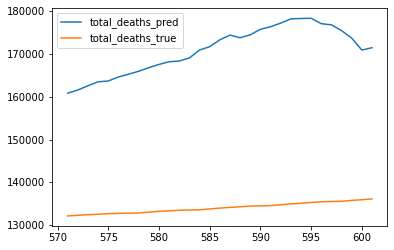

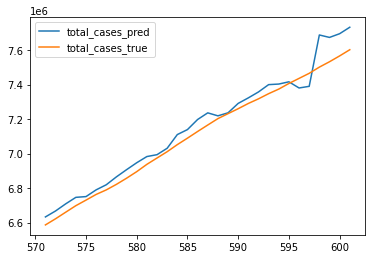

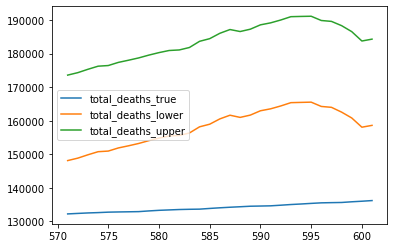

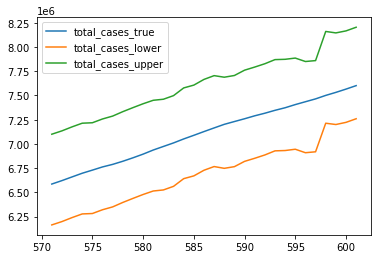

In [29]:
bench = stats(results_path = 'results/mlr/')
# train, test, x_train, x_test = bench.split(scaled_df)
y_pred_scaled, pi_pred_scaled = bench.forecast_mlr(test, x_train, y_train, x_test)
forecasts = bench.descale(y_pred_scaled, scaled_df, train, valid, df_scaler, df)
pi = bench.descale_pi(pi_pred_scaled, scaled_df, train, valid, df_scaler, df)

In [30]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(mis(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values, alpha = dl_layer.alpha))
print(mis(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values, alpha = dl_layer.alpha))

505541.89291548036
938854.059167426


In [31]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(coverage(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values))
print(coverage(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values))

0.0
100.0


In [32]:
print(smape(forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(smape(forecasts['total_cases_true'], forecasts['total_cases_pred']))

24.085698822708856
0.746335717937173


In [33]:
print(rmse(forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(rmse(forecasts['total_cases_true'], forecasts['total_cases_pred']))

37059.466318040926
67412.44389326476
